# 지도 시각화 테스트

In [3]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------------------------  317.4/323.6 kB 20.5 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/15.9 MB 13.5 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.9 MB 12.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 11.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/15.9 MB 11.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.9 MB 11.4 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/15.9 MB 11.4 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/15.9 MB 11.3 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/15.9 MB 11.5 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/15.9 MB 11.5 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcdefaults()


In [245]:
file_path = r'C:\Users\j2982\jupyter notebook\안심구역_죽은상권살리기\서울시 상권분석서비스(영역-상권)\서울시 상권분석서비스(영역-상권).shp'
data = gpd.read_file(file_path)
data.head()

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,"POLYGON ((196955.842 453722.114, 196958.669 45..."
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,"POLYGON ((201385.38 452513.725, 201385.284 452..."
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,"POLYGON ((201937.121 452552.083, 201872.576 45..."
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,"POLYGON ((197550.67 453079.887, 197554.026 453..."
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,"POLYGON ((197428.009 453548.216, 197436.697 45..."


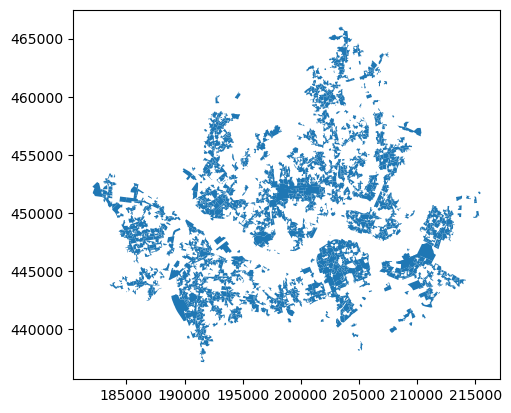

In [87]:
data.plot()
plt.show()

# 1. 죽은 상권 / 뜨는 상권 정의하기

## 파일 불러오기

In [234]:
import pandas as pd

# 파일 경로를 지정하세요
path_2019_store = 'data/서울시_상권분석서비스(점포-상권)_2019년.csv'
path_2022_store = 'data/서울시_상권분석서비스(점포-상권)_2022년.csv'
path_2019_sales = 'data/서울시_상권분석서비스(추정매출-상권)_2019년.csv'
path_2022_sales = 'data/서울시_상권분석서비스(추정매출-상권)_2022년.csv'

# CSV 파일을 데이터프레임으로 불러오기
df_2019_store = pd.read_csv(path_2019_store, encoding='euc-kr')
df_2022_store = pd.read_csv(path_2022_store, encoding='euc-kr')
df_2019_sales = pd.read_csv(path_2019_sales, encoding='euc-kr')
df_2022_sales = pd.read_csv(path_2022_sales, encoding='euc-kr')

# 데이터프레임 확인
print(df_2019_store.head())
print(df_2022_store.head())
print(df_2019_sales.head())
print(df_2022_sales.head())

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드               상권_코드_명 서비스_업종_코드  \
0      20191        R       전통시장  3130018  동대문문구완구거리(동대문문구완구시장)  CS300043   
1      20191        D       발달상권  3120165        서래마을카페거리(서래마을)  CS100007   
2      20191        D       발달상권  3120177               신논현역 1번  CS300015   
3      20191        A       골목상권  3110508                 서연중학교  CS200041   
4      20191        A       골목상권  3110241                먹골역 5번  CS300036   

  서비스_업종_코드_명  점포_수  유사_업종_점포_수  개업_율  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수  
0      전자상거래업    10          10    10        1     0        0           0  
1       치킨전문점     0           1     0        0   100        1           1  
2          가방     3           3     0        0     0        0           0  
3         사진관     6           6    17        1     0        0           0  
4        조명용품     2           2     0        0     0        0           0  
   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드         상권_코드_명 서비스_업종_코드  \
0      202

## 원하는 형태의 데이터 테이블 만들기

In [235]:
selected_columns = [
    '기준_년분기_코드', '상권_코드',
    '상권_코드_명', '점포_수',
     '개업_점포_수', '폐업_점포_수'
]
df_2019_store_selected = df_2019_store[selected_columns]
df_2022_store_selected = df_2022_store[selected_columns]
print(df_2019_store_selected.head())
print(df_2022_store_selected.head())

   기준_년분기_코드    상권_코드               상권_코드_명  점포_수  개업_점포_수  폐업_점포_수
0      20191  3130018  동대문문구완구거리(동대문문구완구시장)    10        1        0
1      20191  3120165        서래마을카페거리(서래마을)     0        0        1
2      20191  3120177               신논현역 1번     3        0        0
3      20191  3110508                 서연중학교     6        1        0
4      20191  3110241                먹골역 5번     2        0        0
   기준_년분기_코드    상권_코드         상권_코드_명  점포_수  개업_점포_수  폐업_점포_수
0      20221  3120143             당산역     3        0        1
1      20221  3111073  둔촌동역 1번(한산중학교)     5        0        0
2      20221  3120214       영동대교남단교차로     4        0        0
3      20221  3120111           목동사거리     4        0        0
4      20221  3130320          암사종합시장     4        0        1


In [236]:
df_2019_store_grouped = df_2019_store.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum',
}).reset_index()
print(df_2019_store_grouped)
#df_2019_store_grouped[df_2019_store_grouped['상권_코드'] == '3110046']

      기준_년분기_코드    상권_코드                       상권_코드_명   점포_수  개업_점포_수  \
0         20191  3001491                      이태원 관광특구   1676       60   
1         20191  3001492        명동 남대문 북창동 다동 무교동 관광특구   9063      274   
2         20191  3001493                  동대문패션타운 관광특구  13496      498   
3         20191  3001494                    종로·청계 관광특구   5158      129   
4         20191  3001495                       잠실 관광특구   2212      123   
...         ...      ...                           ...    ...      ...   
6587      20194  3130323                       둔촌역전통시장    170        3   
6588      20194  3130324                       길동복조리시장    113       11   
6589      20194  3130325                        명일전통시장     88        3   
6590      20194  3130326                     고덕 골목형상점가     74        4   
6591      20194  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)   2772      105   

      폐업_점포_수  
0          59  
1         245  
2         479  
3         133  
4          77  
...       ...  

In [237]:
df_2022_store_grouped = df_2022_store.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '점포_수': 'sum',
    '개업_점포_수': 'sum',
    '폐업_점포_수': 'sum',
}).reset_index()
print(df_2022_store_grouped.head())


   기준_년분기_코드    상권_코드                 상권_코드_명   점포_수  개업_점포_수  폐업_점포_수
0      20221  3001491                이태원 관광특구   1640       39       25
1      20221  3001492  명동 남대문 북창동 다동 무교동 관광특구   8454       63      124
2      20221  3001493            동대문패션타운 관광특구  13101       83      232
3      20221  3001494              종로·청계 관광특구   5088       44       71
4      20221  3001495                 잠실 관광특구   2465       36       66


In [238]:
#매출 데이터는 서비스 업종무관하게 각 상권의 매출만을 나타나게함
df_2019_sales_grouped = df_2019_sales.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '당월_매출_금액': 'sum',
}).reset_index()
print(df_2019_sales_grouped.head())


   기준_년분기_코드    상권_코드                 상권_코드_명      당월_매출_금액
0      20191  3001491                이태원 관광특구   83131949802
1      20191  3001492  명동 남대문 북창동 다동 무교동 관광특구  311534240028
2      20191  3001493            동대문패션타운 관광특구  108434508028
3      20191  3001494              종로·청계 관광특구  247895672197
4      20191  3001495                 잠실 관광특구  138146453561


In [239]:
df_2022_sales_grouped = df_2022_sales.groupby(['기준_년분기_코드', '상권_코드', '상권_코드_명']).agg({
    '당월_매출_금액': 'sum',
}).reset_index()
print(df_2022_sales_grouped.head())


   기준_년분기_코드    상권_코드                 상권_코드_명      당월_매출_금액
0      20221  3001491                이태원 관광특구   72523644100
1      20221  3001492  명동 남대문 북창동 다동 무교동 관광특구  283332346393
2      20221  3001493            동대문패션타운 관광특구   81696730221
3      20221  3001494              종로·청계 관광특구  212062656625
4      20221  3001495                 잠실 관광특구  231338386876


점포끼리, 매출끼리 묶기

In [240]:
df_sales_combined = pd.concat([df_2019_sales_grouped, df_2022_sales_grouped])
print(df_sales_combined.head())
print(df_sales_combined.tail())

   기준_년분기_코드    상권_코드                 상권_코드_명      당월_매출_금액
0      20191  3001491                이태원 관광특구   83131949802
1      20191  3001492  명동 남대문 북창동 다동 무교동 관광특구  311534240028
2      20191  3001493            동대문패션타운 관광특구  108434508028
3      20191  3001494              종로·청계 관광특구  247895672197
4      20191  3001495                 잠실 관광특구  138146453561
      기준_년분기_코드    상권_코드                       상권_코드_명     당월_매출_금액
6217      20224  3130323                       둔촌역전통시장  13523478306
6218      20224  3130324                       길동복조리시장   6236556030
6219      20224  3130325                        명일전통시장   3973269286
6220      20224  3130326                     고덕 골목형상점가  15013907999
6221      20224  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)  19391732219


In [241]:
df_store_combined = pd.concat([df_2019_store_grouped, df_2022_store_grouped])
print(df_store_combined.head())
print(df_store_combined.tail())

   기준_년분기_코드    상권_코드                 상권_코드_명   점포_수  개업_점포_수  폐업_점포_수
0      20191  3001491                이태원 관광특구   1676       60       59
1      20191  3001492  명동 남대문 북창동 다동 무교동 관광특구   9063      274      245
2      20191  3001493            동대문패션타운 관광특구  13496      498      479
3      20191  3001494              종로·청계 관광특구   5158      129      133
4      20191  3001495                 잠실 관광특구   2212      123       77
      기준_년분기_코드    상권_코드                       상권_코드_명  점포_수  개업_점포_수  폐업_점포_수
6587      20224  3130323                       둔촌역전통시장   171        5        2
6588      20224  3130324                       길동복조리시장   122        4        5
6589      20224  3130325                        명일전통시장    99        2        3
6590      20224  3130326                     고덕 골목형상점가   148       11        3
6591      20224  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)  2571        9       50


하나의 테이블에 합치기

In [242]:
df_sales_combined['상권_코드'] = df_sales_combined['상권_코드'].astype(str)
df_store_combined['상권_코드'] = df_store_combined['상권_코드'].astype(str)

In [243]:
combined_data = pd.merge(df_sales_combined, df_store_combined, on=['기준_년분기_코드','상권_코드',  '상권_코드_명' ], how='inner')
print(combined_data)

       기준_년분기_코드    상권_코드                       상권_코드_명      당월_매출_금액   점포_수  \
0          20191  3001491                      이태원 관광특구   83131949802   1676   
1          20191  3001492        명동 남대문 북창동 다동 무교동 관광특구  311534240028   9063   
2          20191  3001493                  동대문패션타운 관광특구  108434508028  13496   
3          20191  3001494                    종로·청계 관광특구  247895672197   5158   
4          20191  3001495                       잠실 관광특구  138146453561   2212   
...          ...      ...                           ...           ...    ...   
12407      20224  3130323                       둔촌역전통시장   13523478306    171   
12408      20224  3130324                       길동복조리시장    6236556030    122   
12409      20224  3130325                        명일전통시장    3973269286     99   
12410      20224  3130326                     고덕 골목형상점가   15013907999    148   
12411      20224  3130327  평화시장(남평화시장, 제일평화시장, 신평화패션타운)   19391732219   2571   

       개업_점포_수  폐업_점포_수  
0           6

In [246]:
# 공간 정보 추가하기
geometry_only_df = data[['TRDAR_CD', 'geometry']]
gdf_data = gpd.GeoDataFrame(geometry_only_df, geometry='geometry')

sales_merge = gdf_data.merge(combined_data, left_on='TRDAR_CD', right_on='상권_코드')
sales_merge.drop(columns=['TRDAR_CD'], inplace=True)
sales_merge

,geometry,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,개업_점포_수,폐업_점포_수
0,"POLYGON ((196955.842 453722.114, 196958.669 45...",20191,3110008,배화여자대학교(박노수미술관),2193129730,192,7,6
1,"POLYGON ((196955.842 453722.114, 196958.669 45...",20192,3110008,배화여자대학교(박노수미술관),3105564147,194,8,6
2,"POLYGON ((196955.842 453722.114, 196958.669 45...",20193,3110008,배화여자대학교(박노수미술관),3264468763,196,9,7
3,"POLYGON ((196955.842 453722.114, 196958.669 45...",20194,3110008,배화여자대학교(박노수미술관),3222490822,198,8,6
4,"POLYGON ((196955.842 453722.114, 196958.669 45...",20221,3110008,배화여자대학교(박노수미술관),4183574341,244,3,4
...,...,...,...,...,...,...,...,...
12407,"POLYGON ((214945 451011.141, 214946.951 450967...",20194,3130326,고덕 골목형상점가,4047270579,74,4,4
12408,"POLYGON ((214945 451011.141, 214946.951 450967...",20221,3130326,고덕 골목형상점가,11668531301,135,6,3
12409,"POLYGON ((214945 451011.141, 214946.951 450967...",20222,3130326,고덕 골목형상점가,12952382338,139,6,1
12410,"POLYGON ((214945 451011.141, 214946.951 450967...",20223,3130326,고덕 골목형상점가,14176421331,142,7,4


## 점포수와 매출을 합쳐 하나의 지수로 만들기

In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sales_merge[['매출액_norm', '점포수_norm']] = scaler.fit_transform(sales_merge[['당월_매출_금액', '점포_수']])
sales_merge['상권_지수'] = (sales_merge['매출액_norm'] +sales_merge['점포수_norm']) / 2
sales_merge

,geometry,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,개업_점포_수,폐업_점포_수,매출액_norm,점포수_norm,상권_지수
0,"POLYGON ((196955.842 453722.114, 196958.669 45...",20191,3110008,배화여자대학교(박노수미술관),2193129730,192,7,6,0.001676,0.013489,0.007582
1,"POLYGON ((196955.842 453722.114, 196958.669 45...",20192,3110008,배화여자대학교(박노수미술관),3105564147,194,8,6,0.002373,0.013635,0.008004
2,"POLYGON ((196955.842 453722.114, 196958.669 45...",20193,3110008,배화여자대학교(박노수미술관),3264468763,196,9,7,0.002494,0.013781,0.008137
3,"POLYGON ((196955.842 453722.114, 196958.669 45...",20194,3110008,배화여자대학교(박노수미술관),3222490822,198,8,6,0.002462,0.013926,0.008194
4,"POLYGON ((196955.842 453722.114, 196958.669 45...",20221,3110008,배화여자대학교(박노수미술관),4183574341,244,3,4,0.003196,0.017280,0.010238
...,...,...,...,...,...,...,...,...,...,...,...
12407,"POLYGON ((214945 451011.141, 214946.951 450967...",20194,3130326,고덕 골목형상점가,4047270579,74,4,4,0.003092,0.004885,0.003989
12408,"POLYGON ((214945 451011.141, 214946.951 450967...",20221,3130326,고덕 골목형상점가,11668531301,135,6,3,0.008915,0.009333,0.009124
12409,"POLYGON ((214945 451011.141, 214946.951 450967...",20222,3130326,고덕 골목형상점가,12952382338,139,6,1,0.009896,0.009624,0.009760
12410,"POLYGON ((214945 451011.141, 214946.951 450967...",20223,3130326,고덕 골목형상점가,14176421331,142,7,4,0.010831,0.009843,0.010337


In [248]:
pivot_table_save = pivot_table
pivot_table_save['상권_코드'] = pivot_table['상권_코드'].astype(str)

NameError: name 'pivot_table' is not defined

In [249]:
pivot_table_save.to_csv('pivot_table.csv', index=True, encoding='utf-8-sig')

NameError: name 'pivot_table_save' is not defined

In [250]:
combined_data[combined_data['상권_코드'] == '3110935']

,기준_년분기_코드,상권_코드,상권_코드_명,당월_매출_금액,점포_수,개업_점포_수,폐업_점포_수
7074,20221,3110935,한전아트센터,59075391,71,4,2
8630,20222,3110935,한전아트센터,51647520,71,1,1
10186,20223,3110935,한전아트센터,54125854,70,1,2
11741,20224,3110935,한전아트센터,48690837,68,1,4


In [251]:
# 필터링: 2019_1 분기와 2022_4 분기 데이터만 선택
filtered_df = sales_merge[sales_merge['기준_년분기_코드'].isin([20191, 20224])]
# 피벗 테이블 생성
pivot_table = filtered_df.pivot_table(index='상권_코드', 
                                     columns='기준_년분기_코드', 
                                     values='상권_지수',
                                     aggfunc='mean')

# 상권_코드_명 데이터 프레임 생성
code_name_df = filtered_df[['상권_코드', '상권_코드_명', 'geometry']].drop_duplicates().set_index('상권_코드')

# 피벗 테이블에 상권_코드_명 추가
pivot_table = pivot_table.join(code_name_df)
# 상권_코드_명을 첫 번째 열로 이동
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table[['상권_코드_명', '상권_코드', 20191, 20224, 'geometry']]
pivot_table = pivot_table.dropna(subset=[20191, 20224])
# 결과 출력
pivot_table

,상권_코드_명,상권_코드,20191,20224,geometry
0,이태원 관광특구,3001491,0.092603,0.094937,"POLYGON ((200205.11 448754.4, 200208.852 44875..."
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,0.449158,0.475900,"POLYGON ((198220.924 452166.599, 198221.268 45..."
2,동대문패션타운 관광특구,3001493,0.533184,0.503967,"POLYGON ((201566.793 452246.873, 201567.849 45..."
3,종로·청계 관광특구,3001494,0.282485,0.298357,"POLYGON ((201385.38 452513.725, 201385.284 452..."
4,잠실 관광특구,3001495,0.133159,0.238749,"POLYGON ((210991.687 447357.041, 211069.592 44..."
...,...,...,...,...,...
1563,둔촌역전통시장,3130323,0.009093,0.011145,"POLYGON ((211924.717 447688.584, 211931.962 44..."
1564,길동복조리시장,3130324,0.004745,0.006575,"POLYGON ((212814.498 448972.661, 212804.818 44..."
1565,명일전통시장,3130325,0.004083,0.004872,"POLYGON ((212922.264 449886.083, 212922.218 44..."
1566,고덕 골목형상점가,3130326,0.003570,0.010876,"POLYGON ((214945 451011.141, 214946.951 450967..."


In [252]:
pivot_table['지수_변화'] =  pivot_table[20224] - pivot_table[20191]
pivot_table

,상권_코드_명,상권_코드,20191,20224,geometry,지수_변화
0,이태원 관광특구,3001491,0.092603,0.094937,"POLYGON ((200205.11 448754.4, 200208.852 44875...",0.002335
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,0.449158,0.475900,"POLYGON ((198220.924 452166.599, 198221.268 45...",0.026742
2,동대문패션타운 관광특구,3001493,0.533184,0.503967,"POLYGON ((201566.793 452246.873, 201567.849 45...",-0.029217
3,종로·청계 관광특구,3001494,0.282485,0.298357,"POLYGON ((201385.38 452513.725, 201385.284 452...",0.015872
4,잠실 관광특구,3001495,0.133159,0.238749,"POLYGON ((210991.687 447357.041, 211069.592 44...",0.105590
...,...,...,...,...,...,...
1563,둔촌역전통시장,3130323,0.009093,0.011145,"POLYGON ((211924.717 447688.584, 211931.962 44...",0.002052
1564,길동복조리시장,3130324,0.004745,0.006575,"POLYGON ((212814.498 448972.661, 212804.818 44...",0.001830
1565,명일전통시장,3130325,0.004083,0.004872,"POLYGON ((212922.264 449886.083, 212922.218 44...",0.000789
1566,고덕 골목형상점가,3130326,0.003570,0.010876,"POLYGON ((214945 451011.141, 214946.951 450967...",0.007305


In [253]:
sorted_pivot_table = pivot_table.sort_values(by='지수_변화', ascending=False)
sorted_pivot_table

,상권_코드_명,상권_코드,20191,20224,geometry,지수_변화
1192,노량진역(노량진),3120153,0.274812,0.461888,"POLYGON ((195001.335 446262.321, 195043.225 44...",0.187076
4,잠실 관광특구,3001495,0.133159,0.238749,"POLYGON ((210991.687 447357.041, 211069.592 44...",0.105590
1266,잠실역,3120227,0.101145,0.190154,"POLYGON ((209314.701 446484.066, 209318.854 44...",0.089009
1170,가산디지털단지,3120131,0.452207,0.529136,"POLYGON ((189333.224 442985.377, 189337.376 44...",0.076930
1188,여의도역(여의도),3120149,0.122367,0.174401,"POLYGON ((193784.777 447073.847, 193878.711 44...",0.052034
...,...,...,...,...,...,...
1099,강변역(테크노마트),3120060,0.082387,0.069773,"POLYGON ((208342.534 448530.843, 208354.63 448...",-0.012614
5,강남 마이스 관광특구,3001496,0.126143,0.113016,"POLYGON ((205269.67 445368.325, 205255.648 445...",-0.013127
1257,코엑스,3120218,0.050612,0.033178,"POLYGON ((205380.616 445952.442, 205386.085 44...",-0.017434
2,동대문패션타운 관광특구,3001493,0.533184,0.503967,"POLYGON ((201566.793 452246.873, 201567.849 45...",-0.029217


In [144]:
sorted_pivot_table.head(10)

,상권_코드_명,상권_코드,20191,20224,geometry,지수_변화
1192,노량진역(노량진),3120153,0.274812,0.461888,"POLYGON ((195001.335 446262.321, 195043.225 44...",0.187076
4,잠실 관광특구,3001495,0.133159,0.238749,"POLYGON ((210991.687 447357.041, 211069.592 44...",0.105590
1266,잠실역,3120227,0.101145,0.190154,"POLYGON ((209314.701 446484.066, 209318.854 44...",0.089009
1170,가산디지털단지,3120131,0.452207,0.529136,"POLYGON ((189333.224 442985.377, 189337.376 44...",0.076930
1188,여의도역(여의도),3120149,0.122367,0.174401,"POLYGON ((193784.777 447073.847, 193878.711 44...",0.052034
1270,가락시장,3120231,0.227972,0.276367,"POLYGON ((210138.829 444221.46, 210137.737 444...",0.048395
1274,문정역,3120235,0.073803,0.120937,"POLYGON ((210784.134 443086.351, 210784.205 44...",0.047134
1228,강남역,3120189,0.288839,0.333104,"POLYGON ((202436.245 444807.399, 202467.011 44...",0.044265
1157,마곡역(마곡),3120118,0.017723,0.061241,"POLYGON ((184989.442 451237.919, 184989.362 45...",0.043518
1048,종로3가역,3120009,0.218407,0.261849,"POLYGON ((199207.018 452745.919, 199209.794 45...",0.043442


In [145]:
sorted_pivot_table.tail(10)

,상권_코드_명,상권_코드,20191,20224,geometry,지수_변화
1434,"이화여대 3,5,7길 상점가",3130179,0.025307,0.021666,"POLYGON ((195263.1 451070.551, 195263.117 4510...",-0.003641
1305,삼익패션타운(남대문시장),3130025,0.030128,0.026405,"POLYGON ((198224.245 451103.373, 198223.367 45...",-0.003724
1316,청평화시장,3130050,0.087446,0.083571,"POLYGON ((201404.356 452127.985, 201382.066 45...",-0.003875
1567,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",3130327,0.106580,0.100882,"POLYGON ((201000.56 452247.242, 201025.915 452...",-0.005698
1076,동대문역사문화공원역,3120037,0.127040,0.120187,"POLYGON ((201016.19 452029.75, 201016.426 4520...",-0.006853
1099,강변역(테크노마트),3120060,0.082387,0.069773,"POLYGON ((208342.534 448530.843, 208354.63 448...",-0.012614
5,강남 마이스 관광특구,3001496,0.126143,0.113016,"POLYGON ((205269.67 445368.325, 205255.648 445...",-0.013127
1257,코엑스,3120218,0.050612,0.033178,"POLYGON ((205380.616 445952.442, 205386.085 44...",-0.017434
2,동대문패션타운 관광특구,3001493,0.533184,0.503967,"POLYGON ((201566.793 452246.873, 201567.849 45...",-0.029217
1079,용산전자상가(용산역),3120040,0.616114,0.472892,"POLYGON ((196758.669 448447.655, 196759.846 44...",-0.143222


## 2019년 1분기에 비해 발달한 상권 TOP 10
1. 노량진역(노량진)
2. 잠실 관광특구
3. 잠실역
4. 가산디지털단지
5. 여의도역(여의도)
6. 가락시장
7. 문정역
8. 강남역
9. 마곡역(마곡)
10. 종로3가역


## 2019년 1분기에 비해 침체된 상권 TOP 10
1. 용산전자상가(용산역)
2. 동대문패션타운 관광특구
3. 코엑스
4. 강남 마이스 관광특구
5. 강변역(테크노마트)
6. 동대문역사문화공원역
7. 평화시장(남평화시장, 제일평화시장, 신평화패션타운)
8. 청평화시장
9. 삼익패션타운(남대문시장)
10. 이화여대 3,5,7길 상점가


# 2. 상권 활성화 원인 찾기

## 변수들 설명

1. 성별: 상주인구의 성비 / 서울시 상권분석서비스(상주인구-상권)
2. 거주인구: 상권의 거주인구 수 / 서울시 상권분석서비스(상주인구-상권)
3. 직장인구: 상권의 직장인구 수 / 서울시 상권분석서비스(직장인구-상권)
4. 상권 면적: 해당 상권의 총 면적 / 서울시 상권분석서비스(영역-상권)
5. 유동인구: 해당 상권의 평균 유동인구 / 서울시 상권분석서비스(길단위인구-상권)
6. 소득수준: 해당 상주인구의 평균 소득 / 서울시 상권분석서비스(소득소비-상권)
7. 지출수준: 상주인구의 평균 지출 총금액 / 서울시 상권분석서비스(소득소비-상권)
8. 지하철역: 해당 상권내 지하철 역의 개수 / 서울시 상권분석서비스(집객시설-상권)
9. 버스 정류장: 해당 상권 내에 위치한 버스 정류장의 개수 / 서울시 상권분석서비스(집객시설-상권)

## 2. 파일 로드하기

In [198]:
import pandas as pd
import geopandas as gpd

path_income = 'data/서울시 상권분석서비스(소득소비-상권).csv'
path_facility = 'data/서울시 상권분석서비스(집객시설-상권).csv'
path_floating = 'data/서울시 상권분석서비스(길단위인구-상권).csv'
path_population = 'data/서울시 상권분석서비스(상주인구-상권).csv'
path_office = 'data/서울시 상권분석서비스(직장인구-상권).csv'
path_area = 'data/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp'

df_income = pd.read_csv(path_income, encoding='euc-kr')
df_facility = pd.read_csv(path_facility, encoding='euc-kr')
df_floating = pd.read_csv(path_floating, encoding='euc-kr')
df_population = pd.read_csv(path_population, encoding='euc-kr')
df_office = pd.read_csv(path_office, encoding='euc-kr')
df_area = gpd.read_file(path_area)

print(df_income.head())
print(df_facility.head())
print(df_floating.head())
print(df_population.head())
print(df_office.head())
print(df_area.head())

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드   상권_코드_명  월_평균_소득_금액  소득_구간_코드  \
0      20231        A       골목상권  3110005       세검정   3768541.0       8.0   
1      20231        A       골목상권  3110006   부암동주민센터   3963935.0       8.0   
2      20231        A       골목상권  3110025     충신시장옆   2770370.0       6.0   
3      20231        A       골목상권  3110648  양천향교역 7번   3402010.0       7.0   
4      20231        A       골목상권  3110026  종로5가역 4번   2729503.0       6.0   

        지출_총금액   식료품_지출_총금액  의류_신발_지출_총금액  생활용품_지출_총금액   의료비_지출_총금액  \
0  884701599.0  221446948.0   109882417.0   64738346.0  111988892.0   
1  267177363.0   71242932.0    32618743.0   19192280.0   36992515.0   
2  232818153.0   65006144.0    27756184.0   17256496.0   32610254.0   
3          NaN          NaN           NaN          NaN          NaN   
4   76260454.0   21823990.0     9075986.0    6042567.0   10672979.0   

     교통_지출_총금액   여가_지출_총금액   문화_지출_총금액    교육_지출_총금액   유흥_지출_총금액  
0  149822911.0  37478670.0  25606895.0  1265

## 3. 하나의 데이터프레임으로 만들기(상권별로)

In [199]:
required_columns = [
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "월_평균_소득_금액", "지출_총금액"],  # df1에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명","지하철_역_수", "버스_정거장_수"],         # df2에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_유동인구_수"],         # df3에서 필요한 열
    ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_상주인구_수", "남성_상주인구_수", "여성_상주인구_수"] ,      # df4에서 필요한 열
     ["기준_년분기_코드", "상권_코드", "상권_코드_명", "총_직장_인구_수"]     # df5에서 필요한 열
   
]
# 필요한 열만 선택
df1_selected = df_income[required_columns[0]]
df2_selected = df_facility[required_columns[1]]
df3_selected = df_floating[required_columns[2]]
df4_selected = df_population[required_columns[3]]
df5_selected = df_office[required_columns[4]]


merged_df = df1_selected
for df in [df2_selected, df3_selected, df4_selected, df5_selected]:
    merged_df = pd.merge(merged_df, df, on=["기준_년분기_코드", "상권_코드", "상권_코드_명"], how="inner")

merged_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,총_직장_인구_수
0,20231,3110005,세검정,3768541.0,8.847016e+08,NaN,6.0,114445,2153,1046,1107,1057
1,20231,3110006,부암동주민센터,3963935.0,2.671774e+08,NaN,1.0,8336,671,329,342,27
2,20231,3110025,충신시장옆,2770370.0,2.328182e+08,NaN,NaN,290561,523,280,243,213
3,20231,3110648,양천향교역 7번,3402010.0,NaN,NaN,6.0,154832,1356,587,769,13
4,20231,3110026,종로5가역 4번,2729503.0,7.626045e+07,NaN,NaN,328618,130,61,69,190
...,...,...,...,...,...,...,...,...,...,...,...,...
21620,20232,3001492,명동 남대문 북창동 다동 무교동 관광특구,3071908.0,7.990605e+08,3.0,44.0,7258225,600,365,235,104830
21621,20232,3001493,동대문패션타운 관광특구,3624671.0,1.889505e+09,5.0,17.0,3408217,1807,941,866,5916
21622,20232,3001494,종로?청계 관광특구,2268084.0,1.880810e+09,3.0,28.0,8580607,1720,1092,628,32892
21623,20232,3001495,잠실 관광특구,4220819.0,8.751577e+09,3.0,20.0,4116726,5902,2885,3017,25240


In [200]:
df_area = df_area.rename(columns={
    'TRDAR_CD' : '상권_코드',
    'TRDAR_CD_N': '상권_코드_명'
})
df_area

,TRDAR_SE_C,TRDAR_SE_1,상권_코드,상권_코드_명,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,"POLYGON ((196955.842 453722.114, 196958.669 45..."
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,"POLYGON ((201385.38 452513.725, 201385.284 452..."
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,"POLYGON ((201937.121 452552.083, 201872.576 45..."
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,"POLYGON ((197550.67 453079.887, 197554.026 453..."
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,"POLYGON ((197428.009 453548.216, 197436.697 45..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,R,전통시장,3130322,고분다리전통시장,211771.0,449208.0,11740,강동구,11740620,천호3동,20499.0,"POLYGON ((211759.866 449221.074, 211779.452 44..."
1646,R,전통시장,3130323,둔촌역전통시장,211868.0,447599.0,11740,강동구,11740660,성내3동,36613.0,"POLYGON ((211924.717 447688.584, 211931.962 44..."
1647,R,전통시장,3130324,길동복조리시장,212690.0,448844.0,11740,강동구,11740685,길동,29464.0,"POLYGON ((212814.498 448972.661, 212804.818 44..."
1648,R,전통시장,3130325,명일전통시장,212839.0,449976.0,11740,강동구,11740530,명일1동,27547.0,"POLYGON ((212922.264 449886.083, 212922.218 44..."


## 4. 변수들 조정

In [201]:
#merged_df['상권_코드'] = merged_df['상권_코드'].astype(str)
#merged_df
df_area['상권_코드'] = df_area['상권_코드'].astype(int)

In [202]:
merged_df = pd.merge(merged_df, df_area[['상권_코드', 'RELM_AR']], on='상권_코드', how='inner')
merged_df=merged_df.rename(columns={
   'RELM_AR': '상권_영역_크기'
})
merged_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,총_직장_인구_수,상권_영역_크기
0,20231,3110005,세검정,3768541.0,884701599.0,NaN,6.0,114445,2153,1046,1107,1057,244923.0
1,20232,3110005,세검정,3768541.0,884701599.0,NaN,6.0,111693,2153,1046,1107,1057,244923.0
2,20233,3110005,세검정,3768541.0,884701599.0,NaN,6.0,110053,2153,1046,1107,1057,244923.0
3,20234,3110005,세검정,3768541.0,884701599.0,NaN,6.0,128743,2153,1046,1107,1057,244923.0
4,20241,3110005,세검정,3768541.0,NaN,NaN,6.0,125332,2153,1046,1107,1057,244923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21620,20213,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,65395,13,10,3,17,2721.0
21621,20214,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,73907,13,10,3,17,2721.0
21622,20221,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,71127,13,10,3,17,2721.0
21623,20222,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,75414,13,10,3,17,2721.0


In [203]:
merged_df.loc[:, '상주인구_성비'] = (
    merged_df['남성_상주인구_수'] / 
    merged_df['여성_상주인구_수'] * 100
)
merged_df = merged_df.drop(columns=['남성_상주인구_수', '여성_상주인구_수'])
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['상주인구_성비'], inplace=True)
merged_df 

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비
0,20231,3110005,세검정,3768541.0,884701599.0,NaN,6.0,114445,2153,1057,244923.0,94.489612
1,20232,3110005,세검정,3768541.0,884701599.0,NaN,6.0,111693,2153,1057,244923.0,94.489612
2,20233,3110005,세검정,3768541.0,884701599.0,NaN,6.0,110053,2153,1057,244923.0,94.489612
3,20234,3110005,세검정,3768541.0,884701599.0,NaN,6.0,128743,2153,1057,244923.0,94.489612
4,20241,3110005,세검정,3768541.0,NaN,NaN,6.0,125332,2153,1057,244923.0,94.489612
...,...,...,...,...,...,...,...,...,...,...,...,...
21620,20213,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,65395,13,17,2721.0,333.333333
21621,20214,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,73907,13,17,2721.0,333.333333
21622,20221,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,71127,13,17,2721.0,333.333333
21623,20222,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,75414,13,17,2721.0,333.333333


In [204]:
merged_df['지출_총금액'] = merged_df['지출_총금액'].apply(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else x)
merged_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비
0,20231,3110005,세검정,3768541.0,884701599.00,NaN,6.0,114445,2153,1057,244923.0,94.489612
1,20232,3110005,세검정,3768541.0,884701599.00,NaN,6.0,111693,2153,1057,244923.0,94.489612
2,20233,3110005,세검정,3768541.0,884701599.00,NaN,6.0,110053,2153,1057,244923.0,94.489612
3,20234,3110005,세검정,3768541.0,884701599.00,NaN,6.0,128743,2153,1057,244923.0,94.489612
4,20241,3110005,세검정,3768541.0,NaN,NaN,6.0,125332,2153,1057,244923.0,94.489612
...,...,...,...,...,...,...,...,...,...,...,...,...
21620,20213,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,65395,13,17,2721.0,333.333333
21621,20214,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,73907,13,17,2721.0,333.333333
21622,20221,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,71127,13,17,2721.0,333.333333
21623,20222,3130284,관악종합시장(신원시장),2656625.0,NaN,NaN,1.0,75414,13,17,2721.0,333.333333


In [229]:
merged_df_filtered = merged_df[merged_df["기준_년분기_코드"] == 20224]
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비
13,20224,3110005,세검정,3768541.0,884701599.00,NaN,6.0,112754,2153,1057,244923.0,94.489612
27,20224,3110006,부암동주민센터,3963935.0,267177363.00,NaN,1.0,8585,671,27,91486.0,96.198830
41,20224,3110025,충신시장옆,2770370.0,232818153.00,NaN,NaN,266935,523,213,39184.0,115.226337
55,20224,3110648,양천향교역 7번,3402010.0,NaN,NaN,6.0,182424,1356,13,283983.0,76.332900
69,20224,3110026,종로5가역 4번,2729503.0,76260454.00,NaN,NaN,313090,130,190,16485.0,88.405797
...,...,...,...,...,...,...,...,...,...,...,...,...
21545,20224,3110122,마장역 2번,2648703.0,569859649.00,NaN,7.0,293387,706,461,80335.0,103.458213
21558,20224,3110948,헌인가구단지,2255617.0,33867500.00,NaN,3.0,43,159,57,198674.0,114.864865
21571,20224,3130153,창동역상점가,2356062.0,NaN,NaN,5.0,166175,162,229,33628.0,440.000000
21585,20224,3130240,영등포유통상가,1745098.0,NaN,NaN,NaN,29799,19,1400,47667.0,850.000000


## 5.NAN값 처리
지하쳘, 버스는 nan -> 0

In [230]:
merged_df_filtered.loc[:, '지하철_역_수'] = merged_df_filtered['지하철_역_수'].fillna(0)
merged_df_filtered.loc[:, '버스_정거장_수'] = merged_df_filtered['버스_정거장_수'].fillna(0)
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비
13,20224,3110005,세검정,3768541.0,884701599.00,0.0,6.0,112754,2153,1057,244923.0,94.489612
27,20224,3110006,부암동주민센터,3963935.0,267177363.00,0.0,1.0,8585,671,27,91486.0,96.198830
41,20224,3110025,충신시장옆,2770370.0,232818153.00,0.0,0.0,266935,523,213,39184.0,115.226337
55,20224,3110648,양천향교역 7번,3402010.0,NaN,0.0,6.0,182424,1356,13,283983.0,76.332900
69,20224,3110026,종로5가역 4번,2729503.0,76260454.00,0.0,0.0,313090,130,190,16485.0,88.405797
...,...,...,...,...,...,...,...,...,...,...,...,...
21545,20224,3110122,마장역 2번,2648703.0,569859649.00,0.0,7.0,293387,706,461,80335.0,103.458213
21558,20224,3110948,헌인가구단지,2255617.0,33867500.00,0.0,3.0,43,159,57,198674.0,114.864865
21571,20224,3130153,창동역상점가,2356062.0,NaN,0.0,5.0,166175,162,229,33628.0,440.000000
21585,20224,3130240,영등포유통상가,1745098.0,NaN,0.0,0.0,29799,19,1400,47667.0,850.000000


In [231]:
merged_df_filtered = merged_df_filtered.dropna()
merged_df_filtered
merged_df_filtered.isna().sum().sum()

0

## 6. 각변수 지수화하기(MINN MAX)

In [232]:
import numpy as np

numeric_df = merged_df_filtered.select_dtypes(include=[np.number])

# 무한대 값 확인
print(np.isinf(numeric_df).any())
merged_df_filtered.isna().sum().sum()

기준_년분기_코드     False
상권_코드         False
월_평균_소득_금액    False
지하철_역_수       False
버스_정거장_수      False
총_유동인구_수      False
총_상주인구_수      False
총_직장_인구_수     False
상권_영역_크기      False
상주인구_성비       False
dtype: bool


0

In [233]:
columns_to_scale = [
    '월_평균_소득_금액', '지출_총금액', '지하철_역_수', '버스_정거장_수',
    '총_유동인구_수', '총_상주인구_수', '총_직장_인구_수', '상권_영역_크기', '상주인구_성비'
]

# NaN 및 Inf 값을 포함하는 행 제거
merged_df_filtered = merged_df_filtered.dropna(subset=columns_to_scale)
merged_df_filtered = merged_df_filtered[~merged_df_filtered.isin([np.inf, -np.inf]).any(axis=1)]

# 정규화할 데이터 추출
data_to_scale = merged_df_filtered[columns_to_scale]

# 정규화 수행
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# 정규화된 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=merged_df_filtered.index)

# 원본 데이터프레임에 정규화된 데이터 병합
merged_df_filtered[columns_to_scale] = scaled_df

# 결과 확인
merged_df_filtered

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비
13,20224,3110005,세검정,0.337006,0.074470,0.0,0.070588,0.013018,0.100759,0.010074,0.098696,0.071539
27,20224,3110006,부암동주민센터,0.360454,0.022399,0.0,0.011765,0.000987,0.031306,0.000248,0.036340,0.073394
41,20224,3110025,충신시장옆,0.217222,0.019501,0.0,0.000000,0.030827,0.024370,0.002022,0.015085,0.094044
69,20224,3110026,종로5가역 4번,0.212318,0.006300,0.0,0.000000,0.036158,0.005952,0.001803,0.005860,0.064937
83,20224,3110949,한남IC,0.364830,0.028343,0.0,0.000000,0.044051,0.028587,0.016045,0.024408,0.060848
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,20224,3001493,동대문패션타운 관광특구,0.319741,0.159196,1.0,0.200000,0.394885,0.084544,0.056425,0.245459,0.086918
21503,20224,3001494,종로?청계 관광특구,0.156946,0.158463,0.6,0.329412,1.000000,0.080467,0.313759,0.264587,0.157705
21517,20224,3001495,잠실 관광특구,0.391281,0.737819,0.6,0.235294,0.482790,0.276455,0.240764,1.000000,0.072771
21545,20224,3110122,마장역 2번,0.202622,0.047921,0.0,0.082353,0.033882,0.032946,0.004388,0.031808,0.081272


In [261]:
pivot_table['상권_코드'] = pivot_table['상권_코드'].astype(int)

In [262]:
final_df = pd.merge(merged_df_filtered, pivot_table[['상권_코드',  20224]], on='상권_코드', how='inner')
final_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비,20224
0,20224,3110005,세검정,0.337006,0.074470,0.0,0.070588,0.013018,0.100759,0.010074,0.098696,0.071539,0.003063
1,20224,3110006,부암동주민센터,0.360454,0.022399,0.0,0.011765,0.000987,0.031306,0.000248,0.036340,0.073394,0.000616
2,20224,3110025,충신시장옆,0.217222,0.019501,0.0,0.000000,0.030827,0.024370,0.002022,0.015085,0.094044,0.002327
3,20224,3110949,한남IC,0.364830,0.028343,0.0,0.000000,0.044051,0.028587,0.016045,0.024408,0.060848,0.005975
4,20224,3110012,성곡미술관,0.538589,0.103142,0.0,0.000000,0.071264,0.089652,0.009930,0.049695,0.060791,0.023276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,20224,3001493,동대문패션타운 관광특구,0.319741,0.159196,1.0,0.200000,0.394885,0.084544,0.056425,0.245459,0.086918,0.503967
1432,20224,3001494,종로?청계 관광특구,0.156946,0.158463,0.6,0.329412,1.000000,0.080467,0.313759,0.264587,0.157705,0.298357
1433,20224,3001495,잠실 관광특구,0.391281,0.737819,0.6,0.235294,0.482790,0.276455,0.240764,1.000000,0.072771,0.238749
1434,20224,3110122,마장역 2번,0.202622,0.047921,0.0,0.082353,0.033882,0.032946,0.004388,0.031808,0.081272,0.010189


In [265]:
final_df = final_df.rename(columns={
    20224 : '상권_활성화_지수'
})
final_df

,기준_년분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,지출_총금액,지하철_역_수,버스_정거장_수,총_유동인구_수,총_상주인구_수,총_직장_인구_수,상권_영역_크기,상주인구_성비,상권_활성화_지수
0,20224,3110005,세검정,0.337006,0.074470,0.0,0.070588,0.013018,0.100759,0.010074,0.098696,0.071539,0.003063
1,20224,3110006,부암동주민센터,0.360454,0.022399,0.0,0.011765,0.000987,0.031306,0.000248,0.036340,0.073394,0.000616
2,20224,3110025,충신시장옆,0.217222,0.019501,0.0,0.000000,0.030827,0.024370,0.002022,0.015085,0.094044,0.002327
3,20224,3110949,한남IC,0.364830,0.028343,0.0,0.000000,0.044051,0.028587,0.016045,0.024408,0.060848,0.005975
4,20224,3110012,성곡미술관,0.538589,0.103142,0.0,0.000000,0.071264,0.089652,0.009930,0.049695,0.060791,0.023276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,20224,3001493,동대문패션타운 관광특구,0.319741,0.159196,1.0,0.200000,0.394885,0.084544,0.056425,0.245459,0.086918,0.503967
1432,20224,3001494,종로?청계 관광특구,0.156946,0.158463,0.6,0.329412,1.000000,0.080467,0.313759,0.264587,0.157705,0.298357
1433,20224,3001495,잠실 관광특구,0.391281,0.737819,0.6,0.235294,0.482790,0.276455,0.240764,1.000000,0.072771,0.238749
1434,20224,3110122,마장역 2번,0.202622,0.047921,0.0,0.082353,0.033882,0.032946,0.004388,0.031808,0.081272,0.010189


## 7. 상권 활성화 지수와의 상관관계분석

In [267]:


columns_to_analyze = [
    '월_평균_소득_금액', '지출_총금액', '지하철_역_수', '버스_정거장_수',
    '총_유동인구_수', '총_상주인구_수', '총_직장_인구_수', '상권_영역_크기', '상주인구_성비', '상권_활성화_지수'
]
df_analysis = final_df[columns_to_analyze]

In [273]:
correlation_matrix = df_analysis.corr()
correlation_with_activation = correlation_matrix['상권_활성화_지수'].sort_values(ascending=False)

# 결과 출력
print(correlation)

상권_활성화_지수     1.000000
상권_영역_크기      0.691157
총_직장_인구_수     0.665658
버스_정거장_수      0.631062
지하철_역_수       0.539349
총_유동인구_수      0.487859
월_평균_소득_금액    0.202824
지출_총금액        0.194188
총_상주인구_수      0.071105
상주인구_성비       0.054279
Name: 상권_활성화_지수, dtype: float64


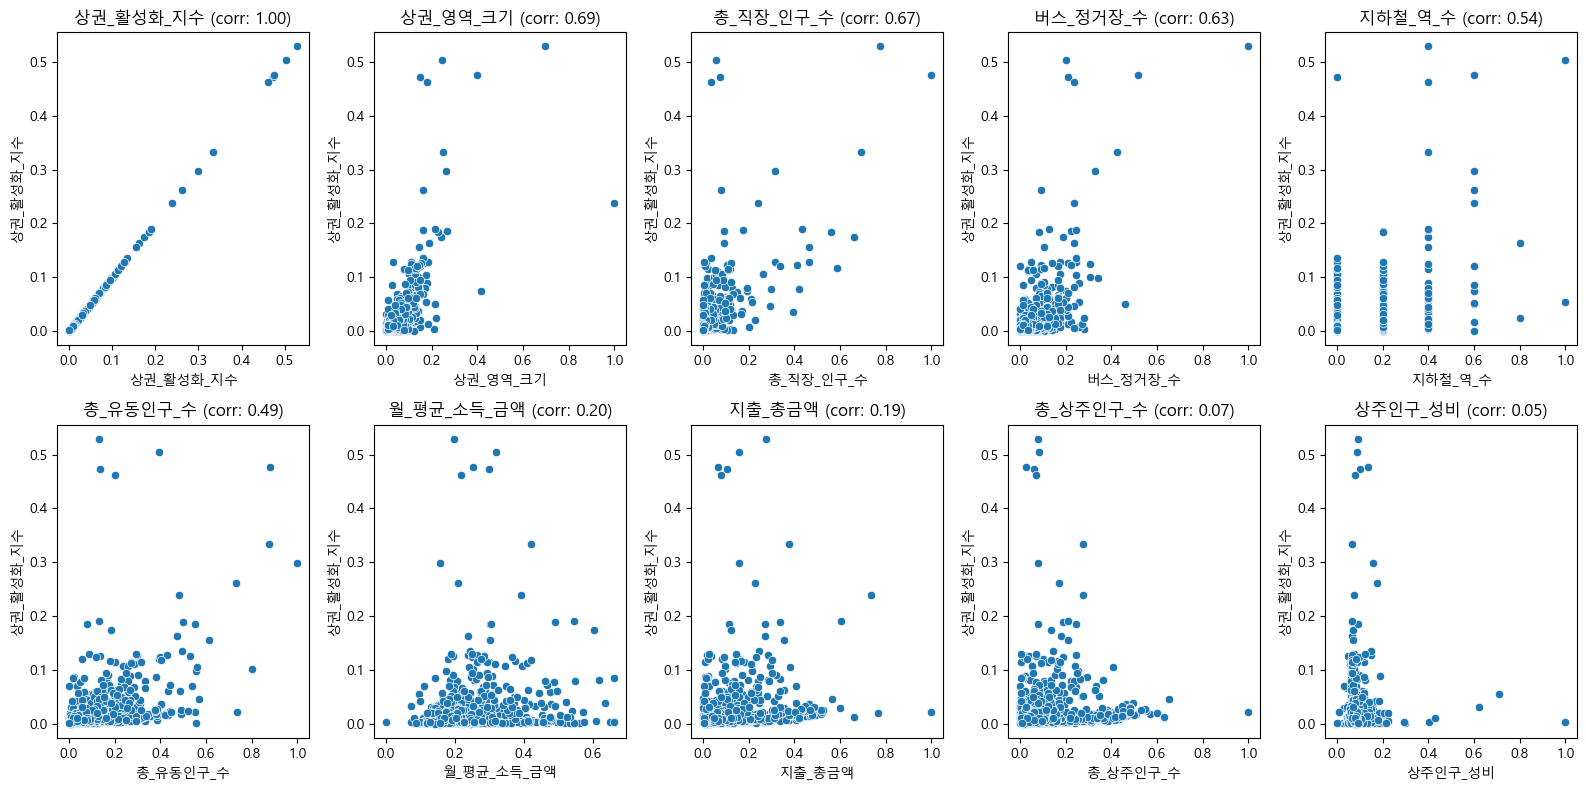

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우 맑은 고딕 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


plt.figure(figsize=(16, 8))

for i, column in enumerate(correlation_with_activation.index):
    plt.subplot(2, 5, i + 1)
    sns.scatterplot(x=df_analysis[column], y=df_analysis['상권_활성화_지수'])
    plt.title(f'{column} (corr: {correlation_with_activation[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('상권_활성화_지수')

plt.tight_layout()
plt.show()

**상권 활성화의 주요 원인: 직장 인구수, 교통 편리성(버스+지하철)**